In [1]:
from keras.models import load_model
#!pip install mtcnn
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

import numpy as np
from mtcnn.mtcnn import MTCNN
from numpy import asarray
#!pip install pycocotools
import io
import os
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt


# Simple python package to shut up Tensorflow warnings and logs.
!pip install silence_tensorflow
import silence_tensorflow.auto

2022-11-28 21:00:21.067905: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-28 21:00:21.204652: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-28 21:00:21.204698: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-28 21:00:21.978066: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

0.1.0


In [45]:
#set up folders for extracted faces and the corresponding captions 
# initialize COCO API for instance annotations
import os
dataDir = './'

image_folder = "extracted_generated_eyes_St_D"

savedirimage = dataDir +  image_folder + "/"


if not os.path.exists(savedirimage):
	os.makedirs(savedirimage)

In [51]:
# extract eyes from extracted_face_image
def extract_eyes_from_extratced_face(filename, index, required_size = (300,100),left_eye_corner = 20, right_eye_corner = 230):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    if len(results)>=1:
        left_right_eye_x_diff = results[0]['keypoints']['right_eye'][0] - results[0]['keypoints']['left_eye'][0] 
        left_right_eye_y_diff = abs(results[0]['keypoints']['right_eye'][1] - results[0]['keypoints']['left_eye'][1]) 
    else:
        return False
    # extract the bounding box from the first face
    if left_right_eye_x_diff>=35 and left_right_eye_y_diff < 6:
        #print(results[0])
        try:
            xeye = left_eye_corner
            yeye = int((results[0]['keypoints']['left_eye'][1]+results[0]['keypoints']['right_eye'][1])/2 -10)
            width = right_eye_corner
            height = int((yeye+results[0]['keypoints']['nose'][1])/2)
            eyes = pixels[yeye:height, xeye:width]
            # resize pixels to the model size
            image = Image.fromarray(eyes)
            image = image.resize(required_size)
            eyes_array = np.asarray(image)
            #plt.imshow(eyes_array)
            plt.imsave(os.path.join(savedirimage, 'eyes_img_{}.jpg'.format(index)),eyes_array)
            return True
        except:
            None
    return False

In [47]:
files = os.listdir('GFW/StableDiffusion/')

In [48]:
len(files)

8050

In [ ]:
index =365
for i in range(1097, len(files)):
    if extract_eyes_from_extratced_face(os.path.join('GFW/StableDiffusion/',files[i]), index = index) and index<=1000:
        print("------------" + str(i) +"---------")
        index+=1

1/1 [==============================] - 0s 149ms/step
------------1097---------
1/1 [==============================] - 0s 136ms/step
------------1104---------
1/1 [==============================] - 0s 181ms/step
------------1108---------
1/1 [==============================] - 0s 152ms/step
------------1110---------
1/1 [==============================] - 0s 121ms/step
------------1116---------
1/1 [==============================] - 0s 123ms/step
------------1118---------
1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 124ms/step
------------1121---------
1/1 [==============================] - 0s 128ms/step
------------1124---------
1/1 [==============================] - 0s 180ms/step
------------1125---------
1/1 [==============================] - 0s 173ms/step
------------1126---------
1/1 [==============================] - 0s 165ms/step
------------1127---------
1/1 [==============================] - 0s 152ms/step
------------1128---------
1/1 [==============================] - 0s 126ms/step
------------1134---------
1/1 [==============================] - 0s 121ms/step
------------1137---------
1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 119ms/step
------------1141---------
1/1 [==============================] - 0s 121ms/step
------------1143---------
1/1 [==============================] - 0s 138ms/step
------------1150---------
1/1 [==============================] - 0s 161ms/step
------------1155---------
1/1 [==============================] - 0s 124ms/step
------------1157---------
1/1 [==============================] - 0s 131ms/step


1/1 [==============================] - 0s 170ms/step
------------1163---------
1/1 [==============================] - 0s 147ms/step
------------1166---------
1/1 [==============================] - 0s 146ms/step
------------1167---------
1/1 [==============================] - 0s 129ms/step
------------1168---------
1/1 [==============================] - 0s 130ms/step
------------1169---------
1/1 [==============================] - 0s 125ms/step
------------1172---------
1/1 [==============================] - 0s 188ms/step
------------1173---------
1/1 [==============================] - 0s 135ms/step
------------1175---------
1/1 [==============================] - 0s 122ms/step
------------1176---------
1/1 [==============================] - 0s 134ms/step
------------1178---------
1/1 [==============================] - 0s 188ms/step
------------1181---------
1/1 [==============================] - 0s 149ms/step
------------1183---------
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 132ms/step
------------1187---------
1/1 [==============================] - 0s 129ms/step
------------1188---------
1/1 [==============================] - 0s 126ms/step
------------1192---------
1/1 [==============================] - 0s 124ms/step
------------1194---------
1/1 [==============================] - 0s 122ms/step
------------1198---------
1/1 [==============================] - 0s 177ms/step
------------1199---------
1/1 [==============================] - 0s 169ms/step
------------1200---------
1/1 [==============================] - 0s 143ms/step
------------1204---------
1/1 [==============================] - 0s 134ms/step
------------1205---------
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 128ms/step
------------1207---------
1/1 [==============================] - 0s 119ms/step
------------1214---------
1/1 [==============================] - 0s 182ms/step
------------1217---------
1/1 [==============================] - 0s 179ms/step
------------1218---------
1/1 [==============================] - 0s 156ms/step
------------1219---------
1/1 [==============================] - 0s 143ms/step
------------1221---------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 124ms/step
------------1228---------
1/1 [==============================] - 0s 120ms/step
------------1231---------
1/1 [==============================] - 0s 120ms/step
------------1232---------
1/1 [==============================] - 0s 127ms/step
------------1234---------
1/1 [==============================] - 0s 139ms/step
------------1240---------
1/1 [==============================] - 0s 127ms/step
------------1245---------
1/1 [==============================] - 0s 122ms/step
------------1249---------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 120ms/step
------------1250---------
1/1 [==============================] - 0s 124ms/step
------------1252---------
1/1 [==============================] - 0s 177ms/step
------------1255---------
1/1 [==============================] - 0s 159ms/step
------------1256---------
1/1 [==============================] - 0s 148ms/step
------------1258---------
1/1 [==============================] - 0s 128ms/step
------------1262---------
1/1 [==============================] - 0s 128ms/step
------------1264---------
1/1 [==============================] - 0s 118ms/step
------------1266---------
1/1 [==============================] - 0s 120ms/step
------------1269---------
1/1 [==============================] - 0s 129ms/step
------------1270---------
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 167ms/step
------------1274---------
1/1 [==============================] - 0s 153ms/step
------------1275---------
1/1 [==============================] - 0s 149ms/step
------------1276---------
1/1 [==============================] - 0s 130ms/step
------------1279---------
1/1 [==============================] - 0s 127ms/step
------------1280---------
1/1 [==============================] - 0s 130ms/step
------------1283---------
1/1 [==============================] - 0s 124ms/step
------------1285---------
1/1 [==============================] - 0s 135ms/step
------------1288---------
1/1 [==============================] - 0s 133ms/step
------------1289---------
1/1 [==============================] - 0s 193ms/step
------------1291---------
1/1 [==============================] - 0s 166ms/step
------------1292---------
1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 127ms/step
------------1298---------
1/1 [==============================] - 0s 132ms/step
------------1300---------
1/1 [==============================] - 0s 128ms/step
------------1302---------
1/1 [==============================] - 0s 121ms/step
------------1306---------
1/1 [==============================] - 0s 121ms/step
------------1307---------
1/1 [==============================] - 0s 182ms/step
------------1309---------
1/1 [==============================] - 0s 158ms/step
------------1311---------
1/1 [==============================] - 0s 147ms/step
------------1312---------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 130ms/step
------------1315---------
1/1 [==============================] - 0s 126ms/step
------------1316---------
1/1 [==============================] - 0s 122ms/step
------------1319---------
1/1 [==============================] - 0s 121ms/step
------------1322---------
1/1 [==============================] - 0s 121ms/step
------------1323---------
1/1 [==============================] - 0s 122ms/step
------------1326---------
1/1 [==============================] - 0s 127ms/step
------------1327---------
1/1 [==============================] - 0s 164ms/step
------------1329---------
1/1 [==============================] - 0s 138ms/step
------------1333---------
1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 126ms/step
------------1337---------
1/1 [==============================] - 0s 122ms/step
------------1343---------
1/1 [==============================] - 0s 147ms/step
------------1353---------
1/1 [==============================] - 0s 125ms/step
------------1355---------
1/1 [==============================] - 0s 129ms/step


1/1 [==============================] - 0s 123ms/step
------------1363---------
1/1 [==============================] - 0s 145ms/step
------------1368---------
1/1 [==============================] - 0s 128ms/step
------------1371---------
1/1 [==============================] - 0s 119ms/step
------------1377---------
1/1 [==============================] - 0s 120ms/step
------------1378---------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 172ms/step
------------1384---------
1/1 [==============================] - 0s 127ms/step
------------1391---------
1/1 [==============================] - 0s 123ms/step
------------1392---------
1/1 [==============================] - 0s 124ms/step
------------1393---------
1/1 [==============================] - 0s 121ms/step
------------1396---------
1/1 [==============================] - 0s 124ms/step
------------1397---------
1/1 [==============================] - 0s 123ms/step
------------1398---------
1/1 [==============================] - 0s 156ms/step
------------1403---------
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 145ms/step
------------1407---------
1/1 [==============================] - 0s 129ms/step
------------1413---------
1/1 [==============================] - 0s 140ms/step
------------1417---------
1/1 [==============================] - 0s 122ms/step
------------1420---------
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 127ms/step
------------1429---------
1/1 [==============================] - 0s 120ms/step
------------1437---------
1/1 [==============================] - 0s 193ms/step
------------1439---------
1/1 [==============================] - 0s 166ms/step
------------1440---------
1/1 [==============================] - 0s 140ms/step
------------1445---------
1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 151ms/step
------------1460---------
1/1 [==============================] - 0s 126ms/step
------------1466---------
1/1 [==============================] - 0s 128ms/step
------------1467---------
1/1 [==============================] - 0s 125ms/step
------------1468---------
1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 121ms/step
------------1471---------
1/1 [==============================] - 0s 119ms/step
------------1474---------
1/1 [==============================] - 0s 148ms/step
------------1478---------
1/1 [==============================] - 0s 144ms/step
------------1479---------
1/1 [==============================] - 0s 126ms/step
------------1483---------
1/1 [==============================] - 0s 122ms/step
------------1489---------
1/1 [==============================] - 0s 126ms/step
------------1491---------
1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 123ms/step
------------1493---------
1/1 [==============================] - 0s 144ms/step
------------1498---------
1/1 [==============================] - 0s 128ms/step
------------1502---------
1/1 [==============================] - 0s 118ms/step
------------1508---------
1/1 [==============================] - 0s 123ms/step
------------1512---------
1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 131ms/step
------------1519---------
1/1 [==============================] - 0s 121ms/step
------------1525---------
1/1 [==============================] - 0s 122ms/step
------------1527---------
1/1 [==============================] - 0s 129ms/step
------------1528---------
1/1 [==============================] - 0s 123ms/step
------------1530---------
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 133ms/step
------------1537---------
1/1 [==============================] - 0s 124ms/step
------------1542---------
1/1 [==============================] - 0s 127ms/step
------------1546---------
1/1 [==============================] - 0s 129ms/step
------------1547---------
1/1 [==============================] - 0s 124ms/step
------------1548---------
1/1 [==============================] - 0s 171ms/step
------------1550---------
1/1 [==============================] - 0s 151ms/step
------------1552---------
1/1 [==============================] - 0s 130ms/step
------------1557---------
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 129ms/step
------------1560---------
1/1 [==============================] - 0s 123ms/step
------------1562---------
1/1 [==============================] - 0s 122ms/step
------------1564---------
1/1 [==============================] - 0s 142ms/step
------------1572---------
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 130ms/step
------------1584---------
1/1 [==============================] - 0s 121ms/step
------------1585---------
1/1 [==============================] - 0s 144ms/step
------------1590---------
1/1 [==============================] - 0s 129ms/step
------------1593---------
1/1 [==============================] - 0s 127ms/step
------------1596---------
1/1 [==============================] - 0s 118ms/step
------------1600---------
1/1 [==============================] - 0s 120ms/step
------------1601---------
1/1 [==============================] - 0s 134ms/step
------------1602---------
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 121ms/step
------------1603---------
1/1 [==============================] - 0s 118ms/step
------------1604---------
1/1 [==============================] - 0s 154ms/step
------------1607---------
1/1 [==============================] - 0s 140ms/step
------------1610---------
1/1 [==============================] - 0s 138ms/step
------------1613---------
1/1 [==============================] - 0s 125ms/step
------------1616---------
1/1 [==============================] - 0s 124ms/step
------------1618---------
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 150ms/step
------------1627---------
1/1 [==============================] - 0s 130ms/step
------------1633---------
1/1 [==============================] - 0s 122ms/step
------------1638---------
1/1 [==============================] - 0s 123ms/step
------------1639---------
1/1 [==============================] - 0s 169ms/step
------------1643---------
1/1 [==============================] - 0s 150ms/step
------------1645---------
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 144ms/step
------------1647---------
1/1 [==============================] - 0s 129ms/step
------------1649---------
1/1 [==============================] - 0s 123ms/step
------------1652---------
1/1 [==============================] - 0s 125ms/step
------------1653---------
1/1 [==============================] - 0s 123ms/step
------------1654---------
1/1 [==============================] - 0s 123ms/step
------------1659---------
1/1 [==============================] - 0s 124ms/step
------------1660---------
1/1 [==============================] - 0s 167ms/step
------------1661---------
1/1 [==============================] - 0s 167ms/step
------------1662---------
1/1 [==============================] - 0s 151ms/step
------------1663---------
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 127ms/step
------------1671---------
1/1 [==============================] - 0s 128ms/step
------------1672---------
1/1 [==============================] - 0s 119ms/step
------------1674---------
1/1 [==============================] - 0s 120ms/step
------------1676---------
1/1 [==============================] - 0s 120ms/step
------------1679---------
1/1 [==============================] - 0s 161ms/step
------------1681---------
1/1 [==============================] - 0s 149ms/step
------------1682---------
1/1 [==============================] - 0s 139ms/step
------------1684---------
1/1 [==============================] - 0s 126ms/step
------------1688---------
1/1 [==============================] - 0s 122ms/step
------------1690---------
1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 121ms/step
------------1694---------
1/1 [==============================] - 0s 119ms/step
------------1696---------
1/1 [==============================] - 0s 145ms/step
------------1701---------
1/1 [==============================] - 0s 134ms/step
------------1703---------
1/1 [==============================] - 0s 128ms/step
------------1706---------
1/1 [==============================] - 0s 125ms/step
------------1709---------
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 124ms/step
------------1716---------
1/1 [==============================] - 0s 156ms/step
------------1718---------
1/1 [==============================] - 0s 150ms/step
------------1719---------
1/1 [==============================] - 0s 143ms/step
------------1720---------
1/1 [==============================] - 0s 140ms/step
------------1723---------
1/1 [==============================] - 0s 122ms/step
------------1729---------
1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 180ms/step
------------1735---------
1/1 [==============================] - 0s 168ms/step
------------1736---------
1/1 [==============================] - 0s 153ms/step
------------1737---------
1/1 [==============================] - 0s 144ms/step
------------1739---------
1/1 [==============================] - 0s 124ms/step
------------1745---------
1/1 [==============================] - 0s 129ms/step
------------1746---------
1/1 [==============================] - 0s 136ms/step
------------1752---------
1/1 [==============================] - 0s 139ms/step
------------1753---------
1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 132ms/step
------------1760---------
1/1 [==============================] - 0s 128ms/step
------------1764---------
1/1 [==============================] - 0s 128ms/step
------------1767---------
1/1 [==============================] - 0s 121ms/step
------------1768---------
1/1 [==============================] - 0s 134ms/step
------------1771---------
1/1 [==============================] - 0s 149ms/step
------------1774---------
1/1 [==============================] - 0s 137ms/step
------------1777---------
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 128ms/step
------------1783---------
1/1 [==============================] - 0s 131ms/step
------------1785---------
1/1 [==============================] - 0s 147ms/step
------------1793---------
1/1 [==============================] - 0s 128ms/step
------------1800---------
1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 124ms/step
------------1801---------
1/1 [==============================] - 0s 121ms/step
------------1807---------
1/1 [==============================] - 0s 165ms/step
------------1809---------
1/1 [==============================] - 0s 161ms/step
------------1811---------
1/1 [==============================] - 0s 141ms/step
------------1814---------
1/1 [==============================] - 0s 135ms/step
------------1815---------
1/1 [==============================] - 0s 121ms/step
------------1822---------
1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 120ms/step
------------1826---------
1/1 [==============================] - 0s 166ms/step
------------1828---------
1/1 [==============================] - 0s 144ms/step
------------1832---------
1/1 [==============================] - 0s 128ms/step
------------1835---------
1/1 [==============================] - 0s 121ms/step
------------1841---------
1/1 [==============================] - 0s 132ms/step
------------1845---------
1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 163ms/step
------------1848---------
1/1 [==============================] - 0s 144ms/step
------------1853---------
1/1 [==============================] - 0s 136ms/step
------------1854---------
1/1 [==============================] - 0s 141ms/step
------------1856---------
1/1 [==============================] - 0s 119ms/step
------------1861---------
1/1 [==============================] - 0s 165ms/step
------------1864---------
1/1 [==============================] - 0s 152ms/step
------------1866---------
1/1 [==============================] - 0s 149ms/step


1/1 [==============================] - 0s 141ms/step
------------1868---------
1/1 [==============================] - 0s 137ms/step
------------1869---------
1/1 [==============================] - 0s 126ms/step
------------1872---------
1/1 [==============================] - 0s 125ms/step
------------1875---------
1/1 [==============================] - 0s 121ms/step
------------1877---------
1/1 [==============================] - 0s 123ms/step
------------1881---------
1/1 [==============================] - 0s 157ms/step
------------1884---------
1/1 [==============================] - 0s 150ms/step
------------1885---------
1/1 [==============================] - 0s 142ms/step
------------1887---------
1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 133ms/step
------------1892---------
1/1 [==============================] - 0s 121ms/step
------------1898---------
1/1 [==============================] - 0s 124ms/step
------------1899---------
1/1 [==============================] - 0s 137ms/step
------------1905---------
1/1 [==============================] - 0s 127ms/step
------------1907---------
1/1 [==============================] - 0s 125ms/step
------------1909---------
1/1 [==============================] - 0s 126ms/step
------------1911---------


1/1 [==============================] - 0s 123ms/step
------------1917---------
1/1 [==============================] - 0s 161ms/step
------------1920---------
1/1 [==============================] - 0s 163ms/step
------------1922---------
1/1 [==============================] - 0s 152ms/step
------------1924---------
1/1 [==============================] - 0s 129ms/step
------------1926---------
1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 163ms/step
------------1938---------
1/1 [==============================] - 0s 117ms/step
------------1952---------
1/1 [==============================] - 0s 122ms/step
------------1955---------
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 170ms/step
------------1956---------
1/1 [==============================] - 0s 164ms/step
------------1957---------
1/1 [==============================] - 0s 143ms/step
------------1959---------
1/1 [==============================] - 0s 141ms/step
------------1966---------
1/1 [==============================] - 0s 128ms/step
------------1967---------
1/1 [==============================] - 0s 122ms/step
------------1968---------
1/1 [==============================] - 0s 126ms/step
------------1969---------
1/1 [==============================] - 0s 121ms/step
------------1972---------
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 135ms/step
------------1980---------
1/1 [==============================] - 0s 130ms/step
------------1981---------
1/1 [==============================] - 0s 121ms/step
------------1985---------
1/1 [==============================] - 0s 120ms/step
------------1987---------
1/1 [==============================] - 0s 119ms/step
------------1990---------
1/1 [==============================] - 0s 120ms/step
------------1992---------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 127ms/step
------------2001---------
1/1 [==============================] - 0s 128ms/step
------------2002---------
1/1 [==============================] - 0s 120ms/step
------------2006---------
1/1 [==============================] - 0s 130ms/step
------------2019---------
1/1 [==============================] - 0s 142ms/step
------------2022---------
1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 121ms/step
------------2028---------
1/1 [==============================] - 0s 161ms/step
------------2031---------
1/1 [==============================] - 0s 147ms/step
------------2033---------
1/1 [==============================] - 0s 141ms/step
------------2034---------
1/1 [==============================] - 0s 139ms/step
------------2036---------
1/1 [==============================] - 0s 126ms/step
------------2041---------
1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 121ms/step
------------2048---------
1/1 [==============================] - 0s 146ms/step
------------2051---------
1/1 [==============================] - 0s 127ms/step
------------2056---------
1/1 [==============================] - 0s 130ms/step
------------2057---------
1/1 [==============================] - 0s 139ms/step
------------2058---------
1/1 [==============================] - 0s 127ms/step
------------2059---------
1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 168ms/step
------------2068---------
1/1 [==============================] - 0s 145ms/step
------------2070---------
1/1 [==============================] - 0s 132ms/step
------------2073---------
1/1 [==============================] - 0s 126ms/step
------------2075---------
1/1 [==============================] - 0s 123ms/step
------------2077---------
1/1 [==============================] - 0s 124ms/step
------------2085---------
1/1 [==============================] - 0s 162ms/step
------------2086---------
1/1 [==============================] - 0s 149ms/step


1/1 [==============================] - 0s 139ms/step
------------2089---------
1/1 [==============================] - 0s 128ms/step
------------2093---------
1/1 [==============================] - 0s 130ms/step
------------2096---------
1/1 [==============================] - 0s 148ms/step
------------2106---------
1/1 [==============================] - 0s 136ms/step
------------2109---------
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 124ms/step
------------2113---------
1/1 [==============================] - 0s 124ms/step
------------2114---------
1/1 [==============================] - 0s 122ms/step
------------2117---------
1/1 [==============================] - 0s 121ms/step
------------2121---------
1/1 [==============================] - 0s 123ms/step
------------2122---------
1/1 [==============================] - 0s 141ms/step
------------2128---------
1/1 [==============================] - 0s 128ms/step
------------2132---------
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 124ms/step
------------2133---------
1/1 [==============================] - 0s 122ms/step
------------2136---------
1/1 [==============================] - 0s 122ms/step
------------2137---------
1/1 [==============================] - 0s 123ms/step
------------2138---------
1/1 [==============================] - 0s 122ms/step
------------2140---------
1/1 [==============================] - 0s 152ms/step
------------2144---------
1/1 [==============================] - 0s 125ms/step
------------2148---------
1/1 [==============================] - 0s 122ms/step
------------2150---------
1/1 [==============================] - 0s 144ms/step
------------2152---------
1/1 [==============================] - 0s 121ms/step
------------2154---------


1/1 [==============================] - 0s 122ms/step
------------2156---------
1/1 [==============================] - 0s 19ms/step


In [40]:
image = Image.open(os.path.join('GFW/StableDiffusion/',files[800]))


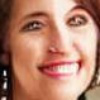

In [41]:
image.show()

In [42]:
image.size

(100, 100)

In [43]:
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = np.asarray(image)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)

1/1 [==============================] - 0s 142ms/step


In [44]:
results

[{'box': [6, 0, 88, 99],
  'confidence': 0.9997949004173279,
  'keypoints': {'left_eye': (34, 25),
   'right_eye': (76, 20),
   'nose': (64, 49),
   'mouth_left': (39, 68),
   'mouth_right': (79, 62)}}]